In [2]:
import matplotlib.pyplot as plt
plt.close("all")
import mglearn
import numpy as np


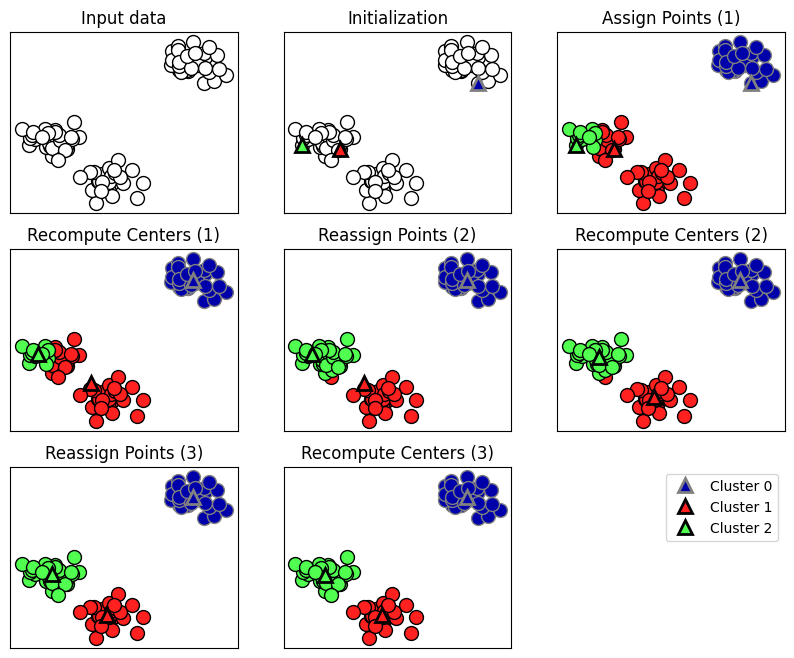

In [3]:
mglearn.plots.plot_kmeans_algorithm()

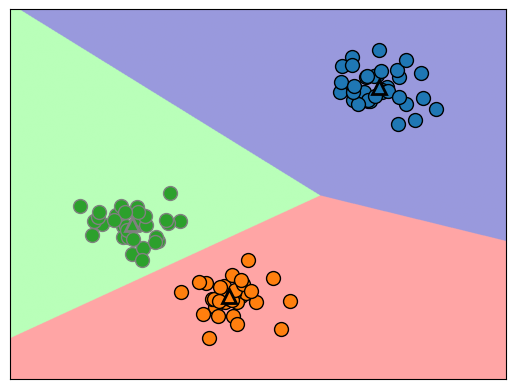

In [4]:
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [6]:
X, y = make_blobs(random_state=1)

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [8]:
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [9]:
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [10]:
print(kmeans.cluster_centers_.shape)

(3, 2)


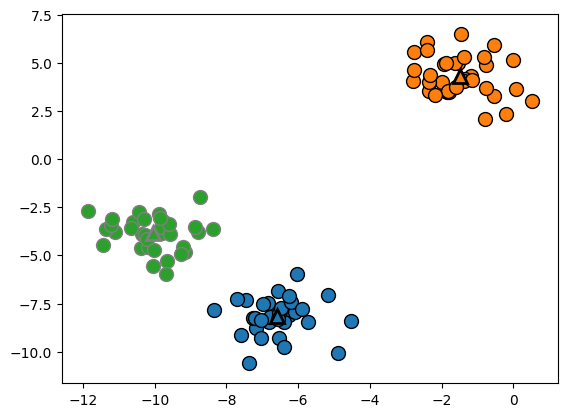

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers="o")
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers="^", markeredgewidth=2
)
plt.show()

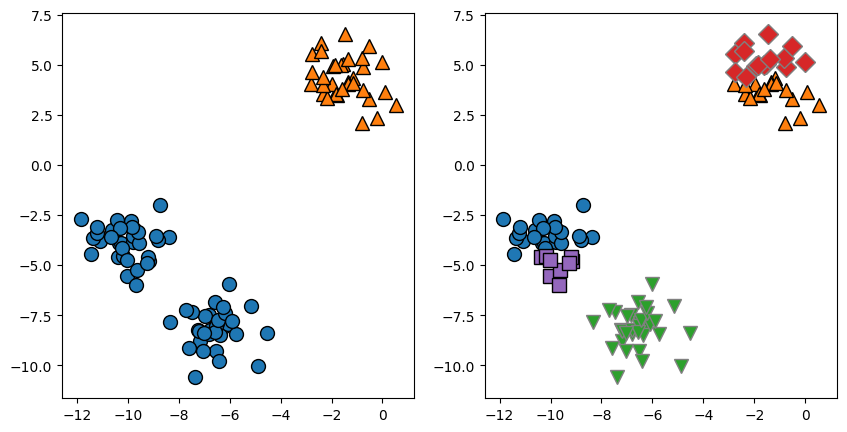

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを2つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])


# クラスタセンタを5つに設定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

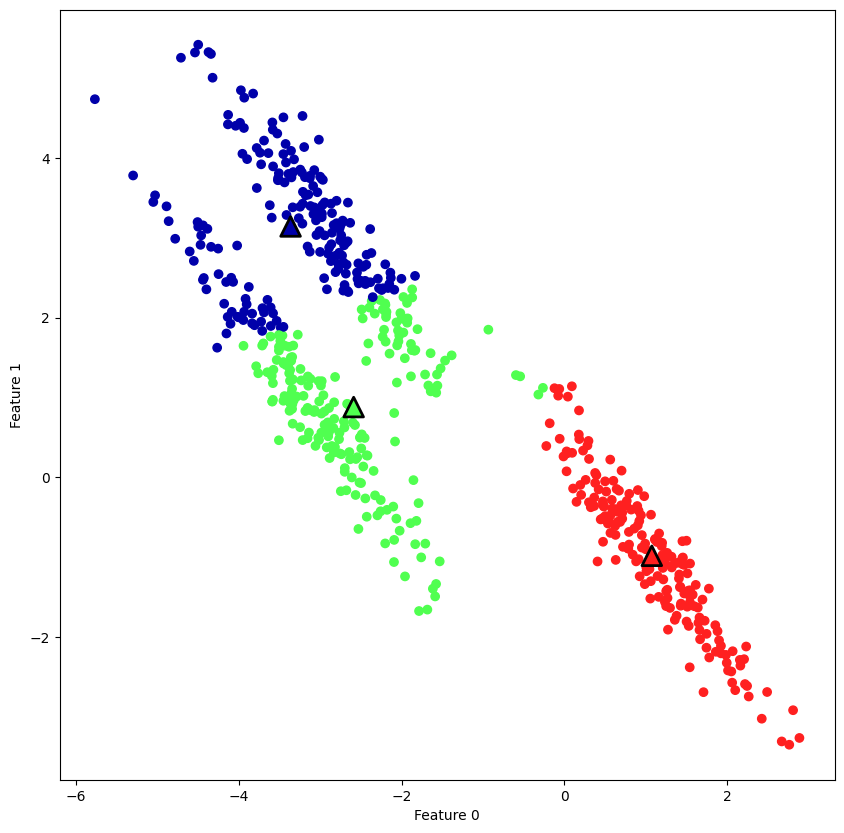

In [13]:
plt.figure(figsize=(10, 10 ))
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.matmul(X, transformation)

# データを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="^", c=[0, 1, 2], s=200, linewidth=2, cmap=mglearn.cm3, edgecolors="black")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [14]:
from sklearn.datasets import make_moons

In [15]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)  # y_predが予想したクラスタ分類
print(y_pred)

[1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1]


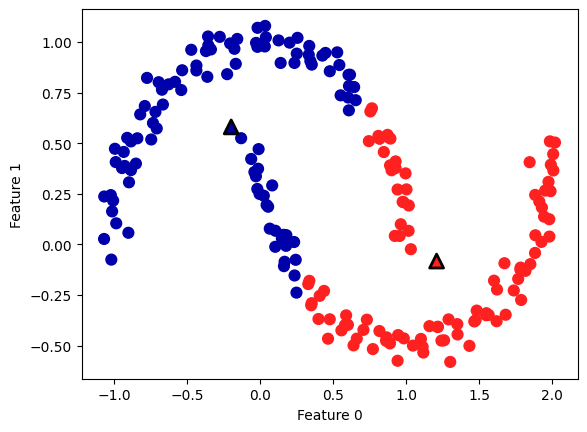

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)  # 予想したクラスタをカラーにいれる
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="^", c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidths=2, edgecolors="black")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans

In [19]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people["images"][0].shape

mask = np.zeros(people["target"].shape, dtype=bool)
for target in np.unique(people["target"]):
    # np.whereはindexを返す
    mask[np.where(target == people["target"])[0][:50]] = True

X_people = people["data"][mask]
y_people = people["target"][mask]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_nmf = np.matmul(nmf.transform(X_test), nmf.components_)
X_pca = pca.inverse_transform(pca.transform(X_test))
X_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

c:\Users\CHU1P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [21]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={"xticks": (), "yticks": ()})


# 全体に共通するタイトルをつける
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")



fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={"xticks": (), "yticks": ()})

fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_kmeans, X_pca, X_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Text(0, 0.5, 'nmf')

In [24]:
plt.close("all")

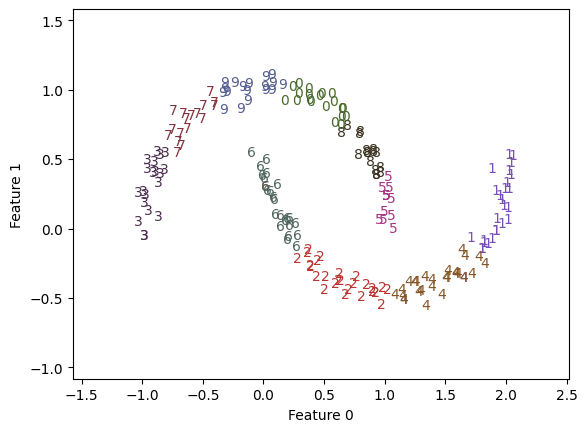

Cluster membershipt: 
 [8 4 6 3 1 1 5 2 8 4 9 2 1 4 7 5 0 2 0 7 1 2 0 4 9 6 1 1 6 0 8 9 2 6 8 1 2
 5 3 6 2 7 8 6 4 9 5 7 6 2 7 2 1 3 4 8 0 4 0 9 2 3 1 8 4 3 9 4 9 3 2 3 2 6
 2 3 6 8 0 2 1 9 2 1 6 9 5 9 2 1 0 5 1 7 1 1 4 2 3 6 4 1 9 5 3 6 3 7 4 0 7
 9 9 3 8 4 8 1 2 8 8 7 6 9 6 7 5 6 4 1 5 7 3 6 4 4 4 3 1 8 6 6 0 9 7 5 6 4
 0 6 2 4 8 0 2 9 4 2 0 0 6 4 0 4 2 1 0 2 4 2 0 3 3 7 6 2 1 7 7 0 4 3 1 4 1
 0 9 2 3 7 3 0 8 5 6 7 1 6 9 4]


In [51]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

colors = ["#476A2A", "#7851B8", "#BD3430" , "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
# plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap="Paired", edgecolors="gray")
for i in range(X.shape[0]):
    plt.text(X[i, 0], X[i, 1], str(y_pred[i]), color=colors[y_pred[i]])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker="^", c=range(kmeans.n_clusters), linewidths=2, cmap="Paired", edgecolors="black")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
print("Cluster membershipt: \n", y_pred)

In [52]:
distance_features = kmeans.transform(X)
print("Distance feature shape:", distance_features.shape)
print("Distance features\n", distance_features)

Distance feature shape: (200, 10)
Distance features
 [[0.53664613 1.15017588 0.93237626 ... 1.48034956 0.002907   1.07736639]
 [1.74138152 0.60592307 1.00666225 ... 2.52921971 1.20779969 2.23716489]
 [0.75710543 1.93145038 0.91586549 ... 0.78321505 0.87573753 0.71838465]
 ...
 [0.9274342  1.73811046 0.57899268 ... 1.11471941 0.83358544 1.04125672]
 [0.3227627  1.97647071 1.47861069 ... 0.81425026 0.84551232 0.28446737]
 [1.63322944 0.47226506 1.02289983 ... 2.46626118 1.09767675 2.14812753]]
